# **Thyroid Disease Detection**
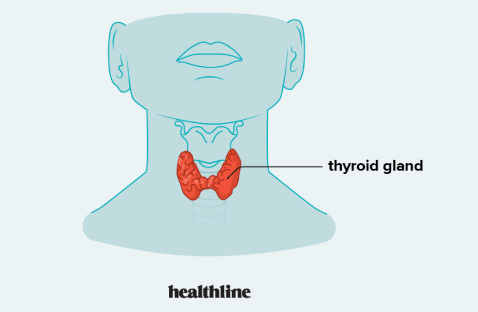

**By :** SIVAKARTHICK B ,
         THARIQ ANSARI

In [1]:
! pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
# Import Some Library 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Read CSV Data
data = pd.read_csv("thyroidDF.csv")

In [4]:
data.head(10)

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   
5   60   F            f                  f                   f    f        f   
6   77   F            f                  f                   f    f        f   
7   28   F            f                  f                   f    f        f   
8   28   F            f                  f                   f    f        f   
9   28   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   
5               f              f                 f  ...    NaN            f   
6               f              f                 f  ...    NaN            f   
7               f              f                 f  ...  116.0            f   
8               f              f                 f  ...   76.0            f   
9               f              f                 f  ...   83.0            f   

  T4U FTI_measured FTI TBG_measured   TBG  referral_source target  patient_id  
0 NaN            f NaN            f   NaN            other      -   840801013  
1 NaN            f NaN            f   NaN            other      -   840801014  
2 NaN            f NaN            t  11.0            other      -   840801042  
3 NaN            f NaN            t  26.0            other      -   840803046  
4 NaN            f NaN            t  36.0            other      S   840803047  
5 NaN            f NaN            t  26.0            other      -   840803048  
6 NaN            f NaN            t  21.0            other      -   840803068  
7 NaN            f NaN            f   NaN              SVI      -   840807019  
8 NaN            f NaN            f   NaN            other      -   840808060  
9 NaN            f NaN            f   NaN            other      -   840808073  

[10 rows x 31 columns]

In [5]:
# number of row's and col in data set 
row,col=data.shape
print("Number of Row's in Data :",row)
print("Number of Col's in Data :",col)

Number of Row's in Data : 9172
Number of Col's in Data : 31


In [6]:
# data duplicate
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [8]:
data.count()

age                    9172
sex                    8865
on_thyroxine           9172
query_on_thyroxine     9172
on_antithyroid_meds    9172
sick                   9172
pregnant               9172
thyroid_surgery        9172
I131_treatment         9172
query_hypothyroid      9172
query_hyperthyroid     9172
lithium                9172
goitre                 9172
tumor                  9172
hypopituitary          9172
psych                  9172
TSH_measured           9172
TSH                    8330
T3_measured            9172
T3                     6568
TT4_measured           9172
TT4                    8730
T4U_measured           9172
T4U                    8363
FTI_measured           9172
FTI                    8370
TBG_measured           9172
TBG                     349
referral_source        9172
target                 9172
patient_id             9172
dtype: int64

In [9]:
data.describe()

age          TSH           T3          TT4          T4U  \
count   9172.000000  8330.000000  6568.000000  8730.000000  8363.000000   
mean      73.555822     5.218403     1.970629   108.700305     0.976056   
std     1183.976718    24.184006     0.887579    37.522670     0.200360   
min        1.000000     0.005000     0.050000     2.000000     0.170000   
25%       37.000000     0.460000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.700000     2.300000   126.000000     1.065000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI         TBG    patient_id  
count  8370.000000  349.000000  9.172000e+03  
mean    113.640746   29.870057  8.529473e+08  
std      41.551650   21.080504  7.581969e+06  
min       1.400000    0.100000  8.408010e+08  
25%      93.000000   21.000000  8.504090e+08  
50%     109.000000   26.000000  8.510040e+08  
75%     128.000000   31.000000  8.607110e+08  
max     881.000000  200.000000  8.701190e+08

#### **Data Cleaning 🧹** 



In [10]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [11]:
data['TBG_measured']

0       f
1       f
2       t
3       t
4       t
       ..
9167    f
9168    f
9169    f
9170    f
9171    f
Name: TBG_measured, Length: 9172, dtype: object

In [12]:
# whether TBG was measured in the blood 
data['TBG_measured'].value_counts()

TBG_measured
f    8823
t     349
Name: count, dtype: int64

In [13]:
# drop TBG Column
data.drop(columns=['TBG','patient_id'],inplace=True)

In [14]:
# Randomly assign mean values to the some missing missing entries in the dataset
# 2604 Is missing entries in T3 column
Random_AVG_T3 = np.random.uniform(data['T3'].mean() - data['T3'].std(), data['T3'].mean() + data['T3'].std(), 2604)
# 809 Is missing entries in T4U column
Random_AVG_T4U = np.random.uniform(data['T4U'].mean() - data['T4U'].std(), data['T4U'].mean() + data['T4U'].std(), 809)
# 842 Is missing entries in TSH column
Random_AVG_TSH = np.random.uniform(data['TSH'].mean() - data['TSH'].std(), data['TSH'].mean() + data['TSH'].std(), 842)
# 442 Is missing entries in TT4 column
Random_AVG_TT4 = np.random.uniform(data['TT4'].mean() - data['TT4'].std(), data['TT4'].mean() + data['TT4'].std(), 442)
# 802 Is missing entries in FTI column
Random_AVG_FTI = np.random.uniform(data['FTI'].mean() - data['FTI'].std(), data['FTI'].mean() + data['FTI'].std(), 802)

In [15]:
# Insert Random value in dataset column T3
data['T3'][data['T3'].isnull()]=Random_AVG_T3

# Insert Random value in dataset column T4U
data['T4U'][data['T4U'].isnull()]=Random_AVG_T4U

# Insert Random value in dataset column T4U
data['TSH'][data['TSH'].isnull()]=Random_AVG_TSH

# Insert Random value in dataset column TT4
data['TT4'][data['TT4'].isnull()]=Random_AVG_TT4

# Insert Random value in dataset column FTI
data['FTI'][data['FTI'].isnull()]=Random_AVG_FTI

In [16]:
# drop missing Entites of sex (Because their one pregnant column also their )
data.dropna(inplace=True)

In [17]:
female,male=data['sex'].value_counts()

print('Total Male   : {}'.format(male))
print('Total Female : {}'.format(female))


Total Male   : 2792
Total Female : 6073


number of row's and col in data set 
row,col=data.shape
print("Number of Row's in Data :",row)
print("Number of Col's in Data :",col)

## **Detecting outliers**

### **Categorical data**
- **If the col is highly imbalanced for eg male 10000 and female 2 then we can eliminate female**

In [18]:
# Handel Outliers of age column
data = data[data['age']<(data['age'].mean() + 3*data['age'].std())]
data = data[data['TSH']<(data['TSH'].mean() + 3*data['TSH'].std())]
data = data[data['T3']<(data['T3'].mean() + 3*data['T3'].std())]
data = data[data['TT4']<(data['TT4'].mean() + 3*data['TT4'].std())]
data = data[data['T4U']<(data['T4U'].mean() + 3*data['T4U'].std())]
data = data[data['FTI']<(data['FTI'].mean() + 3*data['FTI'].std())]

data = data[data['age'] <= 100]

    The diagnosis consists of a string of letters indicating diagnosed conditions.

    Letter  Diagnosis
    ------  ---------

    hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic

    hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

    binding protein:

    I   increased binding protein
    J   decreased binding protein

    general health:

    K   concurrent non-thyroidal illness

    replacement therapy:

    L   consistent with replacement therapy
    M   underreplaced
    N   overreplaced

    antithyroid treatment:

    O   antithyroid drugs
    P   I131 treatment
    Q   surgery

    miscellaneous:

    R   discordant assay results
    S   elevated TBG
    T   elevated thyroid hormones


In [19]:
data['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'L', 'Q', 'J',
       'O', 'LJ', 'H|K', 'GK', 'C|I', 'A', 'KJ', 'P', 'FK', 'B', 'MK',
       'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [20]:
# mapping for target variable
map = {'-':"Negative",'A':'Hyperthyroid','AK':"Hyperthyroid", 'B':"Hyperthyroid", 
           'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid",
           'D|R':"Hyperthyroid", 'E': "Hypothyroid",'F': "Hypothyroid", 
           'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", 
           "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
          }

In [21]:
data['target'] = data['target'].map(map)
data.dropna(subset=['target'], inplace=True)

In [22]:
data['target'].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

In [23]:
data.dropna()

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
0      29   F            f                  f                   f    f   
1      29   F            f                  f                   f    f   
2      41   F            f                  f                   f    f   
3      36   F            f                  f                   f    f   
5      60   F            f                  f                   f    f   
...   ...  ..          ...                ...                 ...  ...   
9166   70   F            f                  f                   f    f   
9167   56   M            f                  f                   f    f   
9168   22   M            f                  f                   f    f   
9170   47   F            f                  f                   f    f   
9171   31   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...        T3  \
0           f               f              f                 t  ...  2.137121   
1           f               f              f                 f  ...  1.900000   
2           f               f              f                 f  ...  1.396080   
3           f               f              f                 f  ...  1.519439   
5           f               f              f                 f  ...  1.103508   
...       ...             ...            ...               ...  ...       ...   
9166        f               f              f                 f  ...  1.181316   
9167        f               f              f                 f  ...  2.041735   
9168        f               f              f                 f  ...  2.275983   
9170        f               f              f                 f  ...  1.349085   
9171        f               f              f                 t  ...  1.563389   

     TT4_measured         TT4 T4U_measured       T4U FTI_measured         FTI  \
0               f  110.931123            f  0.958121            f  114.508947   
1               t  128.000000            f  0.818659            f  141.627682   
2               f  101.491179            f  0.915643            f  149.378772   
3               f  146.105782            f  1.005725            f  128.517875   
5               f   86.654165            f  0.869047            f  153.793292   
...           ...         ...          ...       ...          ...         ...   
9166            t   88.000000            t  0.740000            t  119.000000   
9167            t   64.000000            t  0.830000            t   77.000000   
9168            t   91.000000            t  0.920000            t   99.000000   
9170            t   75.000000            t  0.850000            t   88.000000   
9171            t   66.000000            t  1.020000            t   65.000000   

      TBG_measured referral_source    target  
0                f           other  Negative  
1                f           other  Negative  
2                t           other  Negative  
3                t           other  Negative  
5                t           other  Negative  
...            ...             ...       ...  
9166             f             SVI  Negative  
9167             f             SVI  Negative  
9168             f             SVI  Negative  
9170             f           other  Negative  
9171             f           other  Negative  

[7131 rows x 29 columns]

#### **Data Visualization 🎨** 


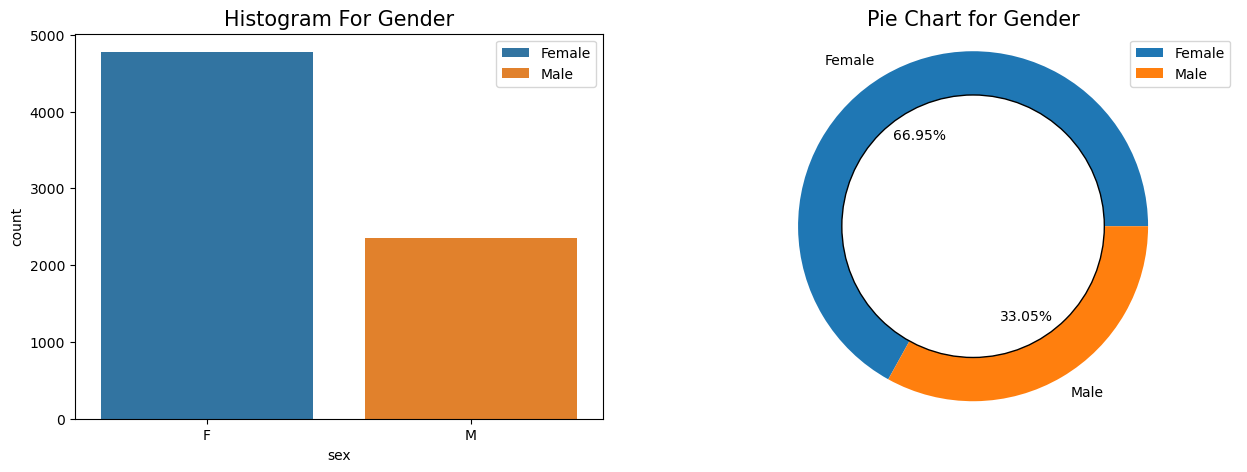

In [24]:
# Plotting For Gender

labels = ['Female', 'Male']
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(data=data, x='sex', hue='sex', alpha=1)
plt.legend(labels)
plt.title('Histogram For Gender',size=15)

plt.subplot(1, 2, 2)  
female, male = data['sex'].value_counts()
y = [female, male]
explode = [0, 0.0]
labels = ['Female', 'Male']
plt.pie(y, labels=labels, explode=explode,autopct='%.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='White', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Pie Chart for Gender', size=15)
plt.show()


- The histogram and pie chart illustrate that 66.42% of the data corresponds to females, while males account for 33.58%. This suggests that the dataset contains a higher proportion of females compared to males.

In [25]:
data['target'].value_counts()

target
Negative        6483
Hypothyroid      547
Hyperthyroid     101
Name: count, dtype: int64

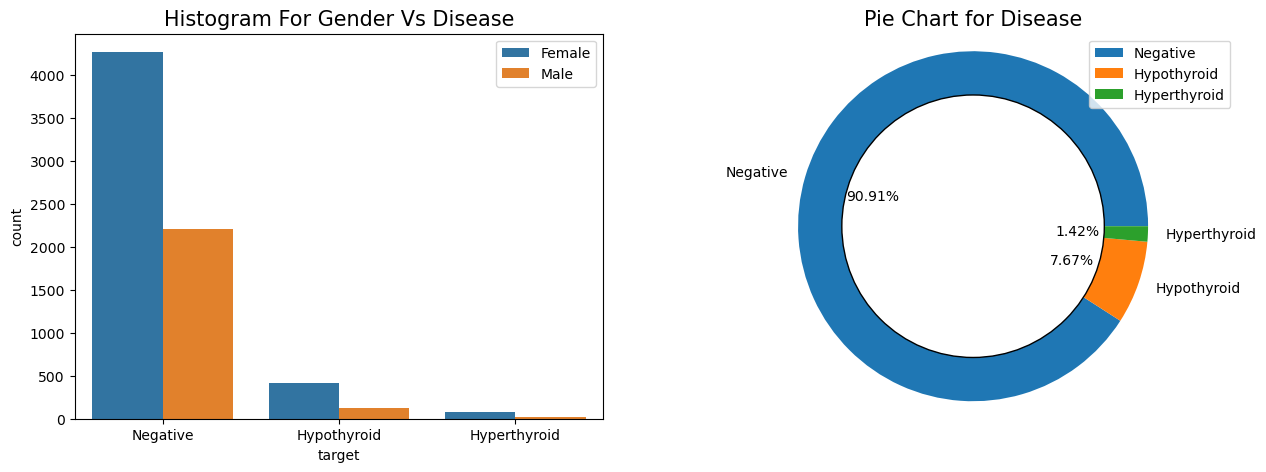

In [26]:
# Plotting For Gender

labels = ['Female','Male']
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(data=data, x='target', hue='sex', alpha=1)
plt.legend(labels)
plt.title('Histogram For Gender Vs Disease',size=15)

plt.subplot(1, 2, 2)  
Negative,Hypothyroid,Hyperthyroid = data['target'].value_counts()
y = [Negative,Hypothyroid,Hyperthyroid]
explode = [0, 0.0,0]
labels = ['Negative', 'Hypothyroid','Hyperthyroid']
plt.pie(y, labels=labels, explode=explode,autopct='%.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='White', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Pie Chart for Disease', size=15)
plt.show()


- The histogram displays gender-specific prevalence across disease types, indicating a higher occurrence in females. Hypothyroidism is the most prevalent, followed by Hyperthyroidism. The majority fall into the "Negative" category, signifying a lack of the depicted diseases.

- The pie chart emphasizes the prevalence of the "Negative" category at 90.89%, with Hyperthyroidism and Hypothyroidism accounting for 7.68% and 1.43%, respectively.

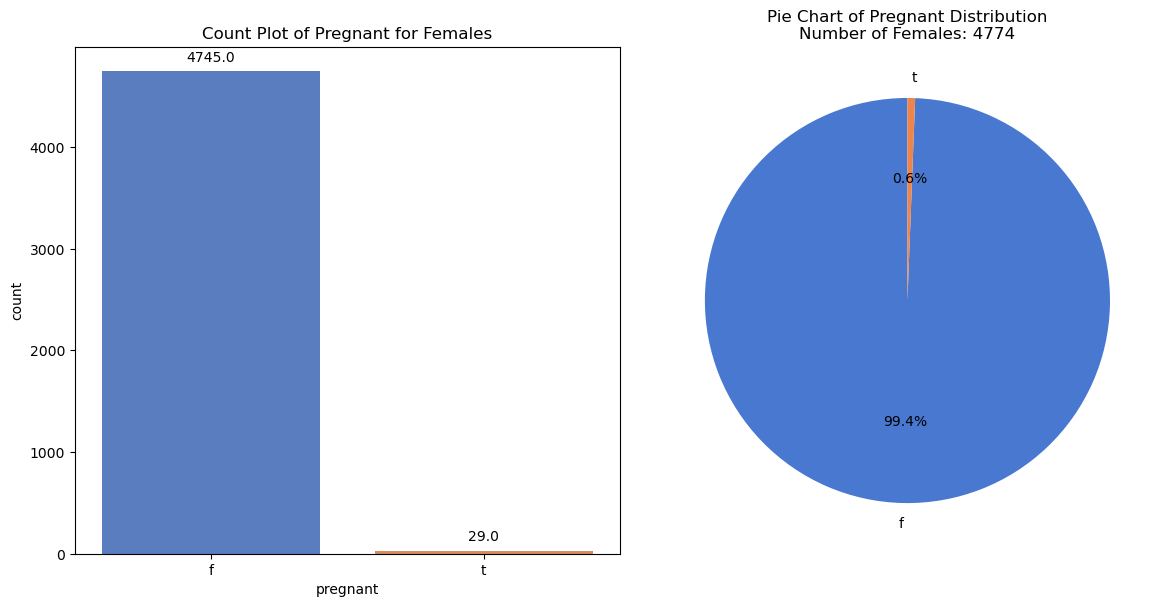

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
female_data = data[data['sex'] == 'F']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Count plot on the left side
sns.countplot(x='pregnant', data=female_data, palette='muted', ax=axes[0])
axes[0].set_title('Count Plot of Pregnant for Females',color='black')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black')

# Pie chart on the right side
pregnant_counts = female_data['pregnant'].value_counts()
axes[1].pie(pregnant_counts, labels=pregnant_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90)
axes[1].set_title('Pie Chart of Pregnant Distribution\nNumber of Females: {}'.format(len(female_data)),color='black')

plt.tight_layout()
plt.show()


- First charts say that pregnant women are too less. Out of 4778 only 30 number of women is pregnet but this data is important for our model. Because we know that measure thyriod  impact 

- Second pie chart shows that 0.6 percenatge of women are pragment out of 100 percent.


In [28]:
!pip install plotly

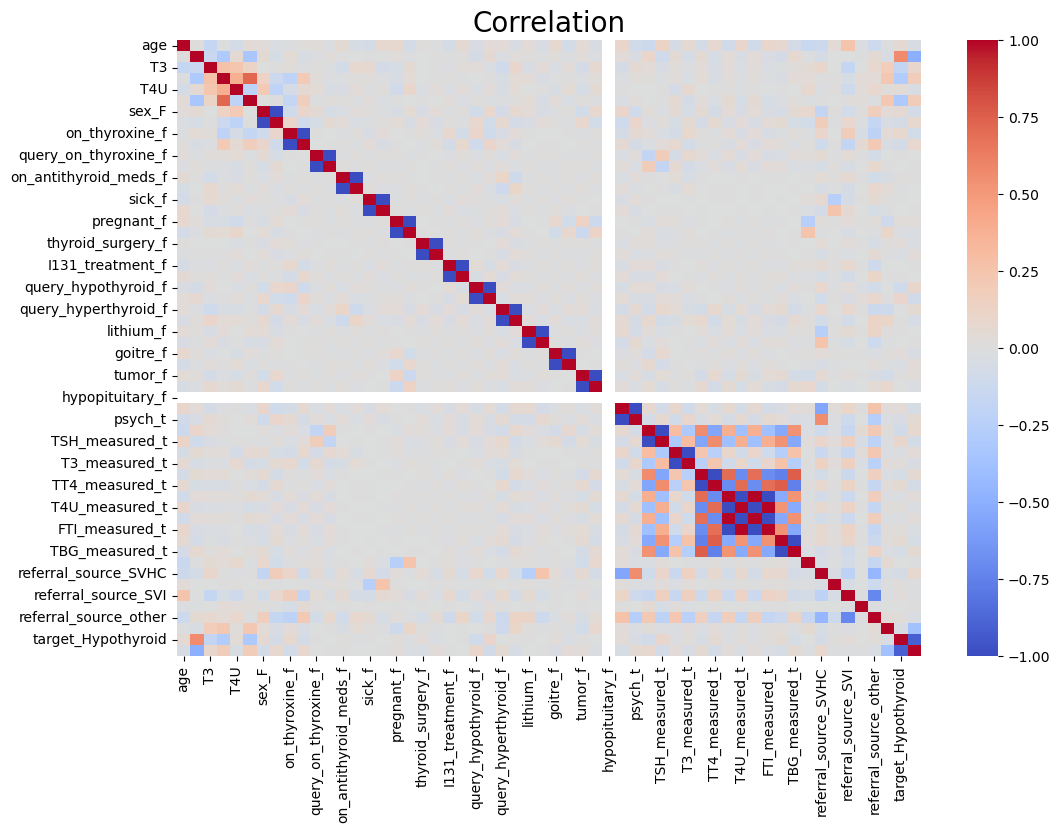

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_encoded = pd.get_dummies(data)

# Create a correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation", fontsize=20)
plt.show()


**Age:**
- Age has a weak negative correlation with T3 and T4U, and a weak positive correlation with TT4 and FTI. This means that as people age, their T3 and T4U levels tend to decrease, while their TT4 and FTI levels tend to increase.

**Sex:** 
- Female sex has a negative correlation with TSH and a positive correlation with FT4. This means that women tend to have lower TSH levels and higher FT4 levels than men.

**Thyroid medication:**
- Being on thyroxine therapy (on_thyroxine_f) has a strong negative correlation with TSH, T3, and FT4. This is expected, as thyroxine medication suppresses the production of TSH and increases thyroid hormone levels. Being on antithyroid medication (on_antithyroid_meds_f) has a positive correlation with TSH and a negative correlation with FT4. This is also expected, as antithyroid medication blocks the production of thyroid hormones and increases TSH levels.

**Other medical conditions:**
- Several other medical conditions are shown to have correlations with thyroid hormone levels. For example, pregnancy (pregnant_f) is associated with higher T4 levels, while hypothyroidism (target_Hypothyroid) is associated with lower T4 levels and higher TSH levels.

### **Convert Categorical To Numerical Data And Drop Unnecessary Columns 🧮** 


**Drop Unnecessary Columns**

In [30]:
selected_columns = ['age','sex', 'TT4', 'T3', 'T4U', 'FTI', 'TSH', 'pregnant', 'target']
data = data[selected_columns]

In [31]:
data.head(10)

age sex         TT4        T3       T4U         FTI        TSH pregnant  \
0    29   F  110.931123  2.137121  0.958121  114.508947   0.300000        f   
1    29   F  128.000000  1.900000  0.818659  141.627682   1.600000        f   
2    41   F  101.491179  1.396080  0.915643  149.378772  -1.302135        f   
3    36   F  146.105782  1.519439  1.005725  128.517875   7.216366        f   
5    60   F   86.654165  1.103508  0.869047  153.793292  21.514635        f   
6    77   F  125.281003  2.426107  0.808323  133.127017  11.681091        f   
7    28   F  116.000000  2.600000  0.782050   79.161959   0.700000        f   
8    28   F   76.000000  1.800000  1.098215  151.655390   1.200000        f   
9    28   F   83.000000  1.700000  0.822759  100.255336   1.900000        f   
10   54   F  133.000000  2.300000  0.904216  152.166640   1.900000        f   

      target  
0   Negative  
1   Negative  
2   Negative  
3   Negative  
5   Negative  
6   Negative  
7   Negative  
8   Negative  
9   Negative  
10  Negative

**Convert Categorical data to numerical**

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target']=le.fit_transform(data['target'])
data['sex']=le.fit_transform(data['sex'])
data['pregnant']=le.fit_transform(data['pregnant'])
data.head(10)

age  sex         TT4        T3       T4U         FTI        TSH  pregnant  \
0    29    0  110.931123  2.137121  0.958121  114.508947   0.300000         0   
1    29    0  128.000000  1.900000  0.818659  141.627682   1.600000         0   
2    41    0  101.491179  1.396080  0.915643  149.378772  -1.302135         0   
3    36    0  146.105782  1.519439  1.005725  128.517875   7.216366         0   
5    60    0   86.654165  1.103508  0.869047  153.793292  21.514635         0   
6    77    0  125.281003  2.426107  0.808323  133.127017  11.681091         0   
7    28    0  116.000000  2.600000  0.782050   79.161959   0.700000         0   
8    28    0   76.000000  1.800000  1.098215  151.655390   1.200000         0   
9    28    0   83.000000  1.700000  0.822759  100.255336   1.900000         0   
10   54    0  133.000000  2.300000  0.904216  152.166640   1.900000         0   

    target  
0        2  
1        2  
2        2  
3        2  
5        2  
6        2  
7        2  
8        2  
9        2  
10       2

In [33]:
print('Size of data frame after convert numeric data set :',data.shape)
print('Rows :',data.shape[0])
print('Columns :',data.shape[1])

Size of data frame after convert numeric data set : (7131, 9)
Rows : 7131
Columns : 9


#### **Training And Testing Sets For Machine Learning**

In [34]:
y = data[['target']] # Depended
x = data[['age','sex', 'TT4', 'T3', 'T4U', 'FTI', 'TSH', 'pregnant']] # independent

In [35]:
y.value_counts()

target
2         6483
1          547
0          101
Name: count, dtype: int64

In [36]:
y.head(5)

target
0       2
1       2
2       2
3       2
5       2

- **Split data into Training and Testing**

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [38]:
y.value_counts()

target
2         6483
1          547
0          101
Name: count, dtype: int64

In [39]:
print('Length of Training Set :',len(x_train))
print('Length of Testing Set :',len(x_test))

Length of Training Set : 4991
Length of Testing Set : 2140


#### **Model Execution:**


**KNN (K- Neighrest Neighbour Classifier)**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3);
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
knn.score(x_test,y_test)

0.9369158878504673

In [42]:
from sklearn.metrics import mean_squared_error

#Predicted On The Test Set
y_pred= knn.predict(x_test)

# Evaluate The Model
Training_score  = knn.score(x_train,y_train)
Testing_score  = knn.score(x_test,y_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('Training Score :', Training_score, '%')
print('Testing Score :', Testing_score, '%')
print('Mean Squared Error (MSE) :', mse)
print('Root Mean Squared Error (RMSE) :', rmse)
print('R-squared (R2) :', r2)
print('Adjusted R-squared :', adj_r2)

Training Score : 0.9645361650971749 %
Testing Score : 0.9369158878504673 %
Mean Squared Error (MSE) : 0.08551401869158878
Root Mean Squared Error (RMSE) : 0.29242780081857606
R-squared (R2) : 0.2908762012026964
Adjusted R-squared : 0.2882140752569534


In [43]:
r = knn.predict(x_test)
r[1]

2

In [44]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)

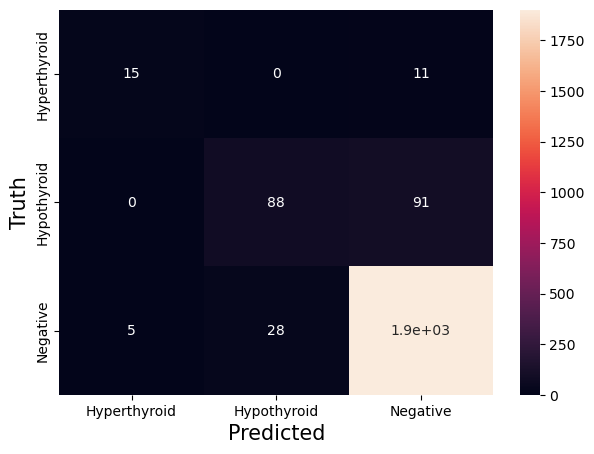

In [45]:
# confusion metric visual
import seaborn as sn
plt.figure(figsize=(7,5))
cm_df = pd.DataFrame(cm,
                     index = ['Hyperthyroid','Hypothyroid','Negative'], 
                     columns = ['Hyperthyroid','Hypothyroid','Negative'])
sn.heatmap(cm_df,annot=True)

plt.xlabel('Predicted',color='black',size=15)
plt.ylabel('Truth',color='black',size=15)
plt.show()

**In this confusion matrix:**

- For class 0 (Hyperthyroid)
- For class 1 (Hypothyroid)
- For class 2 (Negative)

In [46]:
from sklearn.metrics import classification_report

# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.58      0.65        26
           1       0.76      0.49      0.60       179
           2       0.95      0.98      0.97      1935

    accuracy                           0.94      2140
   macro avg       0.82      0.68      0.74      2140
weighted avg       0.93      0.94      0.93      2140



KNN:
Training Score: 0.9645361650971749
Testing Score: 0.9369158878504673
F1 Score: 0.9310430601777205
Precision: 0.9307500371477477
Recall: 0.9369158878504673
Accuracy: 0.9369158878504673

Decision Tree:
Training Score: 0.9619314766579844
Testing Score: 0.9565420560747664
F1 Score: 0.956426352958757
Precision: 0.9599273921442635
Recall: 0.9565420560747664
Accuracy: 0.9565420560747664



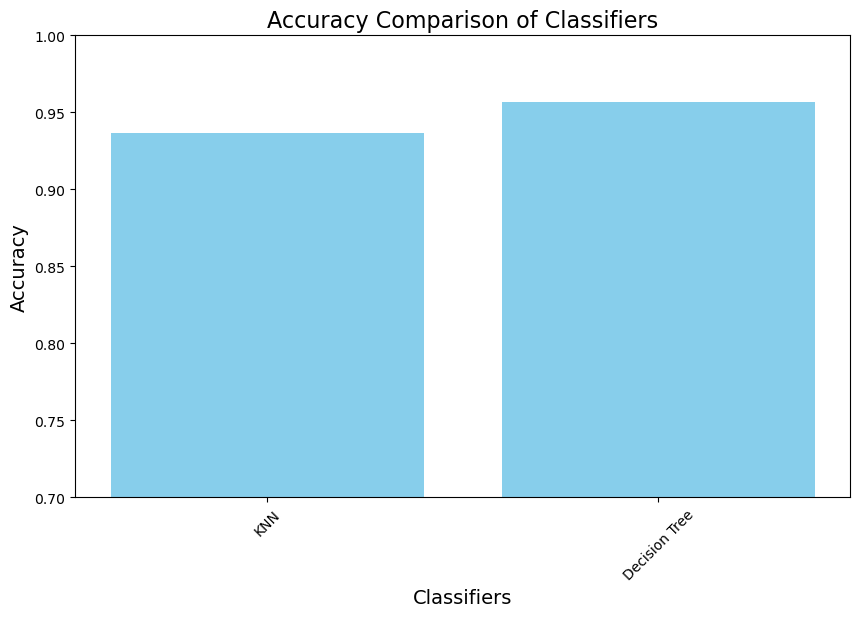

In [47]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Initialize KNN with 5 neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


# Initialize classifiers
classifiers = {
    "KNN": knn,
    "Decision Tree": DecisionTreeClassifier(max_depth=3, min_samples_split=20, min_samples_leaf=5)
}

# Evaluate other classifiers
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    training_score = clf.score(x_train, y_train)
    testing_score = clf.score(x_test, y_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print("Training Score:", training_score)
    print("Testing Score:", testing_score)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print()

# Accuracy comparison graph
accuracies = [clf.score(x_test, y_test) for clf in classifiers.values()]
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), accuracies, color='skyblue')
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison of Classifiers', fontsize=16)
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### **Improve Model Accuracy (By Over-sampling Dataset) :**

In [48]:
y = data[['target']] # Depended
x = data[['age','sex', 'TT4', 'T3', 'T4U', 'FTI', 'TSH', 'pregnant']] # independent

In [49]:
y.value_counts()

target
2         6483
1          547
0          101
Name: count, dtype: int64

In [50]:
# Handle Imbalancing (Create multiple point for balancing)
from imblearn.combine import SMOTETomek 
from imblearn.over_sampling import SMOTE

In [51]:
oversample = SMOTE()
x1, y1 = oversample.fit_resample(x, y)

In [52]:
import pandas as pd

# Assuming x1 and y1 are numpy arrays
# Convert them into DataFrames
x1_df = pd.DataFrame(x1, columns=x.columns)  # Assuming x has column names
y1_df = pd.DataFrame(y1, columns=['target'])  # Assuming y doesn't have column name

# Concatenate x1 and y1 along columns
data1 = pd.concat([x1_df, y1_df], axis=1)

In [53]:
data1['target'].value_counts()

target
2    6483
1    6483
0    6483
Name: count, dtype: int64

In [54]:
import plotly.express as px

# Assuming data is your DataFrame
fig = px.scatter_3d(data1, x='T4U', y='T3', z='TSH', color='target',
                    color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'},
                    size='age', opacity=0.7, hover_data=['age', 'target'])

# Set the layout to make it full page
fig.update_layout(width=800, height=800)

# Show the plot
fig.show()


In [55]:
x2 = data1.drop('target',axis=1)
y2 = data1['target']


In [56]:
y2.value_counts()

target
2    6483
1    6483
0    6483
Name: count, dtype: int64

- **Split data into Training and Testing**

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.3)

In [58]:
print('Length of Training Set :',len(x_train))
print('Length of Testing Set :',len(x_test))

Length of Training Set : 13614
Length of Testing Set : 5835




**KNN (K- Neighrest Neighbour Classifier) {Over sampling)**


In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
knn.score(x_test,y_test)

0.95955441302485

In [61]:
from sklearn.metrics import mean_squared_error

#Predicted On The Test Set
y_pred= knn.predict(x_test)

# Evaluate The Model
Training_score  = knn.score(x_train,y_train)
Testing_score  = knn.score(x_test,y_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('Training Score :', Training_score, '%')
print('Testing Score :', Testing_score, '%')
print('Mean Squared Error (MSE) :', mse)
print('Root Mean Squared Error (RMSE) :', rmse)
print('R-squared (R2) :', r2)
print('Adjusted R-squared :', adj_r2)


Training Score : 0.9765682385779345 %
Testing Score : 0.95955441302485 %
Mean Squared Error (MSE) : 0.10522707797772066
Root Mean Squared Error (RMSE) : 0.3243872346096878
R-squared (R2) : 0.8410558284365302
Adjusted R-squared : 0.8408375734807272


### **Confusion Matrix**

In [62]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)

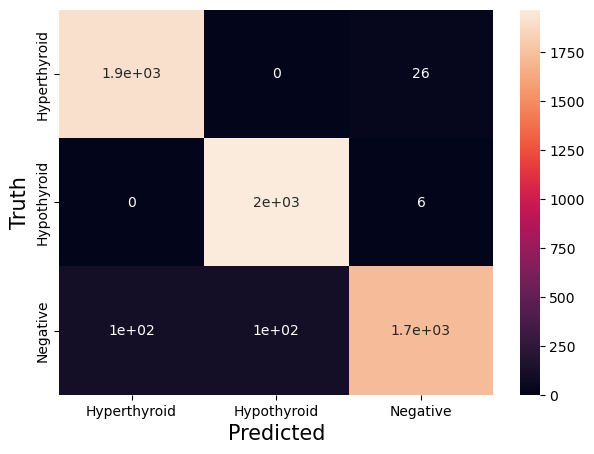

In [63]:
# confusion metric visual
import seaborn as sn
plt.figure(figsize=(7,5))
cm_df = pd.DataFrame(cm,
                     index = ['Hyperthyroid','Hypothyroid','Negative'], 
                     columns = ['Hyperthyroid','Hypothyroid','Negative'])
sn.heatmap(cm_df,annot=True)

plt.xlabel('Predicted',color='black',size=15)
plt.ylabel('Truth',color='black',size=15)
plt.show()

In [64]:
from sklearn.metrics import classification_report

# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1935
           1       0.95      1.00      0.97      1972
           2       0.98      0.89      0.94      1928

    accuracy                           0.96      5835
   macro avg       0.96      0.96      0.96      5835
weighted avg       0.96      0.96      0.96      5835



KNN:
Training Score: 0.9765682385779345
Testing Score: 0.95955441302485
F1 Score: 0.9590413569581696
Precision: 0.9604923221476571
Recall: 0.95955441302485
Accuracy: 0.95955441302485

Decision Tree:
Training Score: 0.9640076391949464
Testing Score: 0.9609254498714653
F1 Score: 0.9605959595645192
Precision: 0.9614145506696641
Recall: 0.9609254498714653
Accuracy: 0.9609254498714653



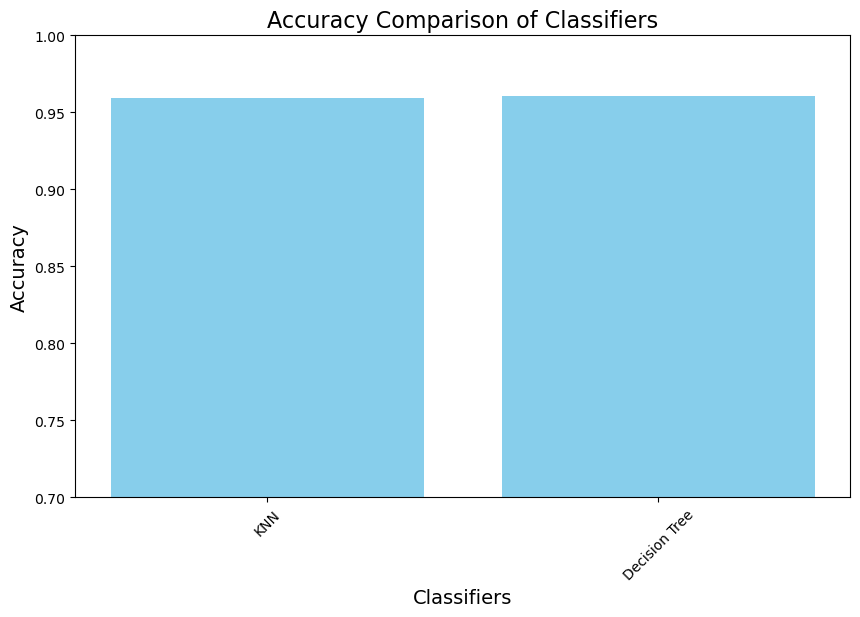

In [65]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Initialize KNN with 3 neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Initialize classifiers
classifiers = {
    "KNN": knn,
    "Decision Tree": DecisionTreeClassifier(max_depth=3, min_samples_split=20, min_samples_leaf=5)
}

# Evaluate other classifiers
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    training_score = clf.score(x_train, y_train)
    testing_score = clf.score(x_test, y_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print("Training Score:", training_score)
    print("Testing Score:", testing_score)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print()

# Accuracy comparison graph
accuracies = [clf.score(x_test, y_test) for clf in classifiers.values()]
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), accuracies, color='skyblue')
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison of Classifiers', fontsize=16)
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()

In [66]:
# Make Web Page 
!pip install streamlit
import pickle
import streamlit as st
import pandas as pd

pickle.dump(knn,open('model.pkl','wb'))

In [67]:
data.head(2)

age  sex         TT4        T3       T4U         FTI  TSH  pregnant  target
0   29    0  110.931123  2.137121  0.958121  114.508947  0.3         0       2
1   29    0  128.000000  1.900000  0.818659  141.627682  1.6         0       2

In [68]:
def dis_prediction(sex,pregnant,TT4,T3,T4U,FTI,TSH):
    result =knn.predict([[sex,pregnant,TT4,T3,T4U,FTI,TSH]])
    return result

### **Test 1**

In [69]:
knn = pickle.load(open('model.pkl','rb'))
print(knn.predict([[63,1,48.0,2.84,1.0,47.0,65.0,1]]))

[1]


In [70]:
import numpy as np

def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    a=lower_bound
    b=upper_bound
    
    outliers_removed = [x for x in data if x >= lower_bound and x <= upper_bound]
    return outliers_removed,a,b

# Example usage
data = [-5,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
cleaned_data = remove_outliers(data)
print("Original data:", data)
print("Data with outliers removed:", cleaned_data)



Original data: [-5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
Data with outliers removed: ([-5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], -5.5, 16.5)
